<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/9th_lec_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2つの量的変数の関係の可視化

## 生活保護と学力

2015年子供の生活保護受給率（％）と2018年子供の学力（算数Aおよび理科）の関係を見てみましょう．


In [20]:
!pip install xlrd==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement xlrd==2.1.0 (from versions: 0.5.2, 0.6.1a4, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.7.7, 0.7.8, 0.7.9, 0.8.0, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 1.0.0, 1.1.0, 1.2.0, 2.0.0, 2.0.1)
ERROR: No matching distribution found for xlrd==2.1.0


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data =[['Sapporo'	,	39.0	,	8.9	,	9.4	]	,
[	'Sendai' ,	14.0	,	9.0	,	9.7	]	,
[	'Saitama'	,	11.1	,	9.1	,	10.1	]	,
[	'Chiba'	,	13.6	,	8.9	,	9.9	]	,
[	'Yokohama'	,	15.4	,	9.3	,	9.7	]	,
[	'Kawasaki'	,	17.7	,	9.2	,	9.7	]	,
[	'Sagamihara'	,	20.4	,	8.5	,	9.3	]	,
[	'Niigata'	,	10.8	,	9.3	,	9.9	]	,
[	'Shizuoka'	,	8.6	,	9.0	,	9.7	]	,
[	'Hamamatsu'	,	6.9	,	8.6	,	9.7	]	,
[	'Nagoya'	,	14.5	,	8.5	,	9.6	]	,
[	'Kyoto'	,	31.8	,	9.2	,	10.2	]	,
[	'Osaka'	,	40.1	,	8.6	,	8.8	]	,
[	'Sakai'	,	25.8	,	9.1	,	9.4	]	,
[	'Kobe'	,	28.1	,	8.9	,	9.3	]	,
[	'Okayama'	,	16.2	,	8.7	,	9.7	]	,
[	'Hiroshima'	,	20.7	,	9.0	,	9.9	]	,
[	'Kitakyushu'	,	15.4	,	8.6	,	9.6	]	,
[	'Fukuoka'	,	21.3	,	9.0	,	10.0	]	,
[	'Kumamoto'	,	15.5	,	8.8	,	9.9	]]

df_gakuryoku = pd.DataFrame(data, columns=['City', 'Welfare_Rate', 'Math', 'Science'])
df_gakuryoku


,City,Welfare_Rate,Math,Science
0,Sapporo,39.0,8.9,9.4
1,Sendai,14.0,9.0,9.7
2,Saitama,11.1,9.1,10.1
3,Chiba,13.6,8.9,9.9
4,Yokohama,15.4,9.3,9.7
5,Kawasaki,17.7,9.2,9.7
6,Sagamihara,20.4,8.5,9.3
7,Niigata,10.8,9.3,9.9
8,Shizuoka,8.6,9.0,9.7
9,Hamamatsu,6.9,8.6,9.7


散布図（scatter plot）を描きます．一般的に，要因を横軸，それに伴う結果を縦軸に取ることが多いです．

ここでは，貧しさ（原因）が学力（その結果）に及ぼす影響を検討したいので，横軸は学力ではなく生活保護率にしなければならない


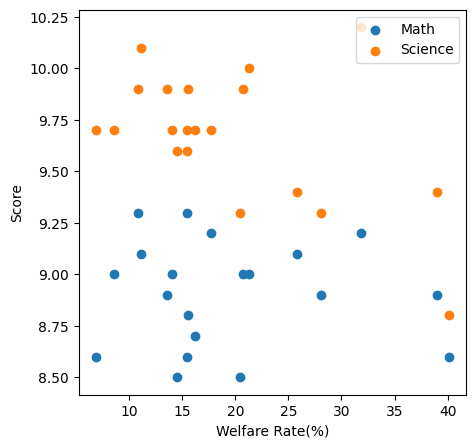

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(df_gakuryoku['Welfare_Rate'],df_gakuryoku['Math'])
plt.scatter(df_gakuryoku['Welfare_Rate'],df_gakuryoku['Science'])
plt.xlabel('Welfare Rate(%)')
plt.ylabel('Score')
plt.legend(['Math', 'Science'], loc='upper right')
plt.show()

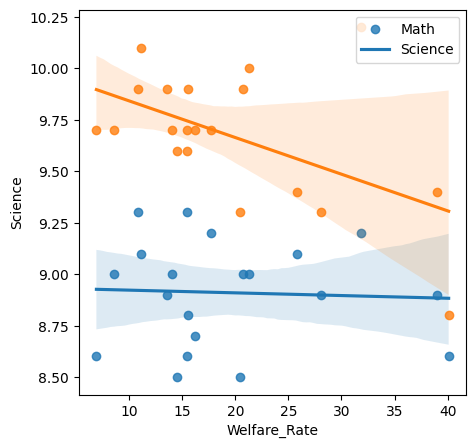

In [24]:
#回帰直線を描くこともできる
import seaborn as sns

plt.figure(figsize=(5,5))
sns.regplot(x = 'Welfare_Rate', y = 'Math',data=df_gakuryoku)
sns.regplot(x = 'Welfare_Rate', y = 'Science',data=df_gakuryoku)
plt.legend(['Math', 'Science'], loc='upper right')

In [25]:
#相関係数
df_gakuryoku.corr()

<ipython-input-25-de6efee059a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_gakuryoku.corr()


,Welfare_Rate,Math,Science
Welfare_Rate,1.000000,-0.047576,-0.514307
Math,-0.047576,1.000000,0.497704
Science,-0.514307,0.497704,1.000000


##Irisデータセットで相関を見る

sepal length (がくの長さ)、sepal width (がくの幅)、petal length (花弁の長さ)、petal width (花弁の幅) の関係を見てみましょう


In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#scikit-learnライブラリからデータセットだけを用いる
from sklearn import datasets

#Irisデータを読み込みます
iris = datasets.load_iris()

#Iris.dataには花の特徴量がある．iris.targetに'target'と名前をつけて一つのDataFrameに統合
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

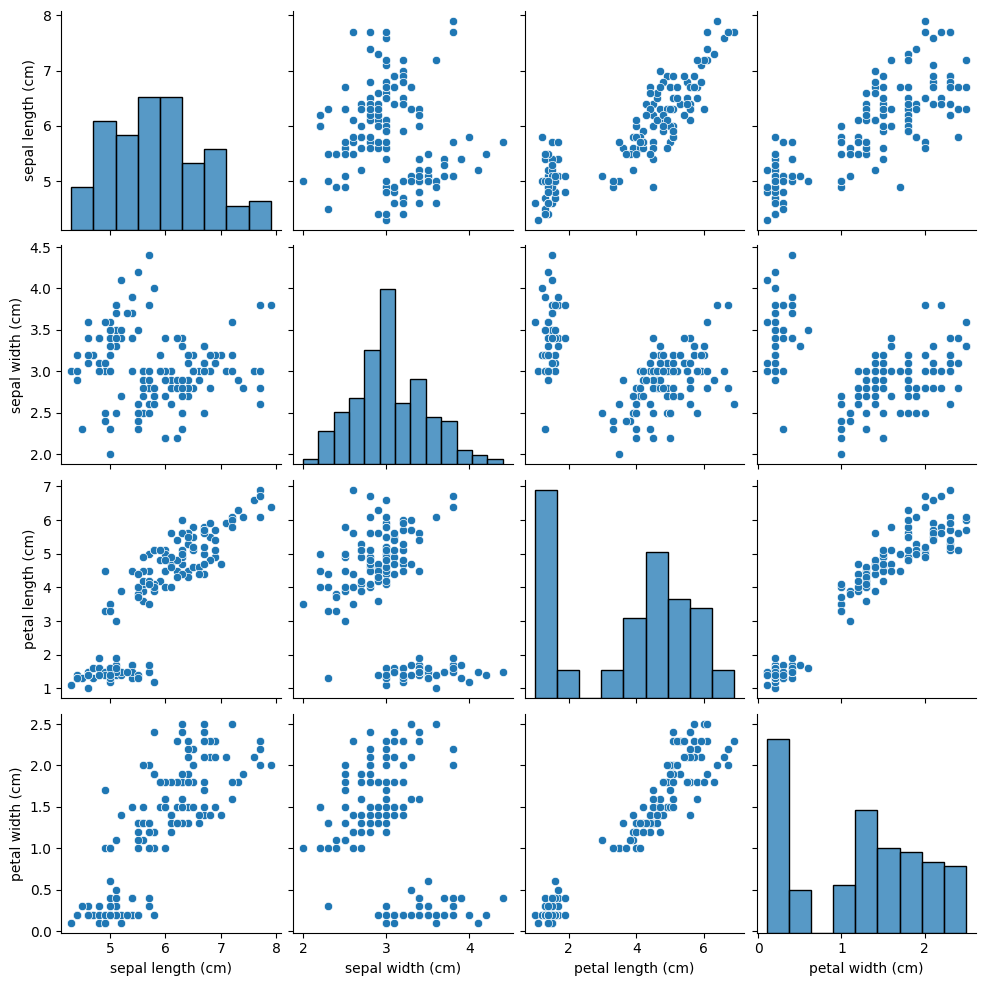

In [27]:
#ペアプロット（種の区別なし）
sns.pairplot(df)

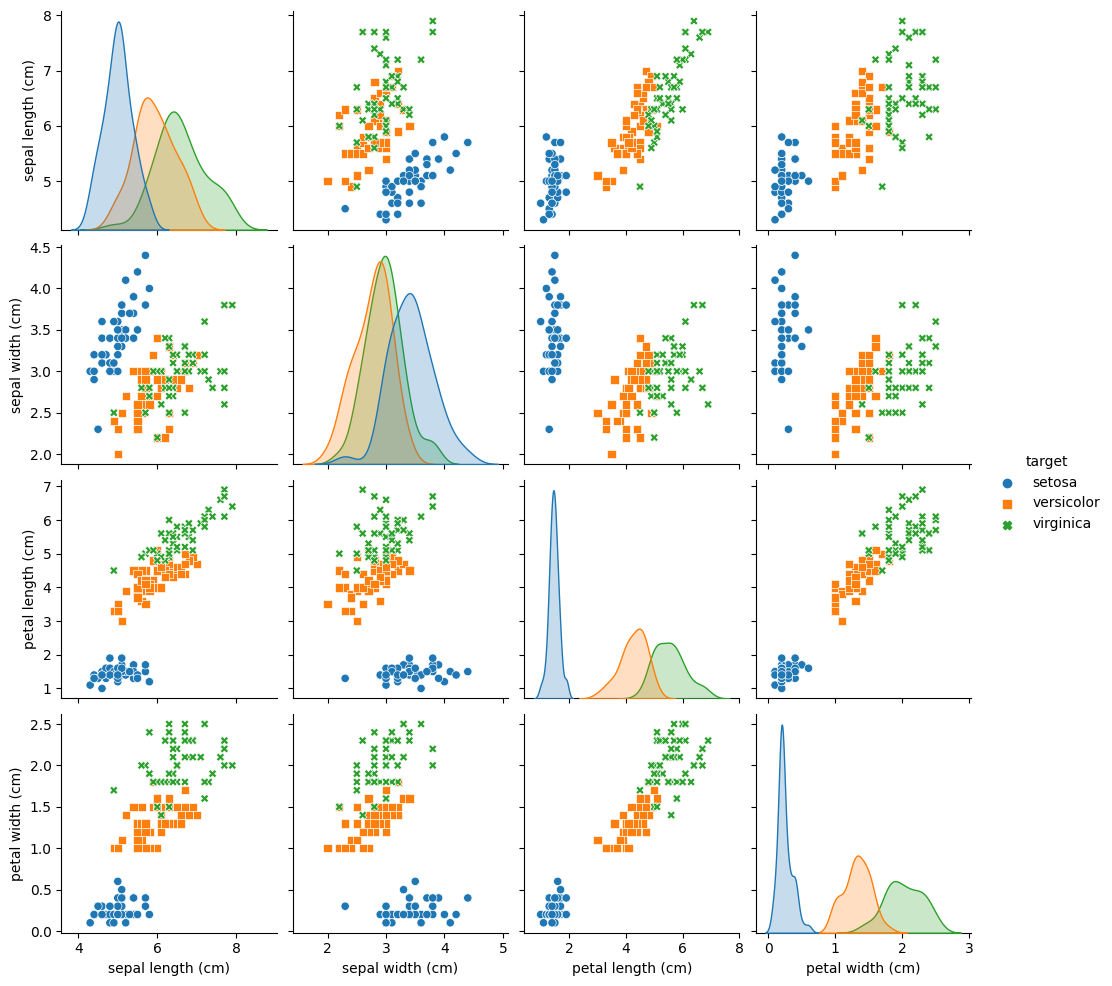

In [28]:
#ペアプロット（種の区別あり）
sns.pairplot(df, hue='target', markers=["o", "s", "X"])

In [29]:
#相関係数の算出
df.drop('target', axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


##GDPと特殊出生率

小森のGoogle Drive上のデータを読み込むためにurllibライブラリを使います．

ネタ元はこちらです
https://honkawa2.sakura.ne.jp/1563.html

In [30]:
import pandas as pd
import urllib
import io

url = "https://drive.google.com/uc?id=1W98VH-en4XoYI1zx7i8ruYh3Y2kWA_Ee"
res = urllib.request.urlopen(url)
res=res.read().decode('shift-jis')
df =pd.read_csv(io.StringIO(res))

#Indexをname列にする
df.set_index(['国名'],inplace=True)
df.head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
カタール,1,134290,2.04,False
マカオ,2,127743,1.06,False
ルクセンブルク,3,89577,1.57,True
クウェート,4,83840,2.63,False
シンガポール,5,75952,1.29,False


まずは１人当たりGDP（米ドル・ＰＰＰベースと合計特殊出生率を散布図にプロットしてみましょう．

基本的に散布図ではX軸は「原因」Y軸は「結果」と対応するように書くのが普通です．

GDPが出生率に影響していると考えるなら，GDPを横軸，出生率を縦軸にします


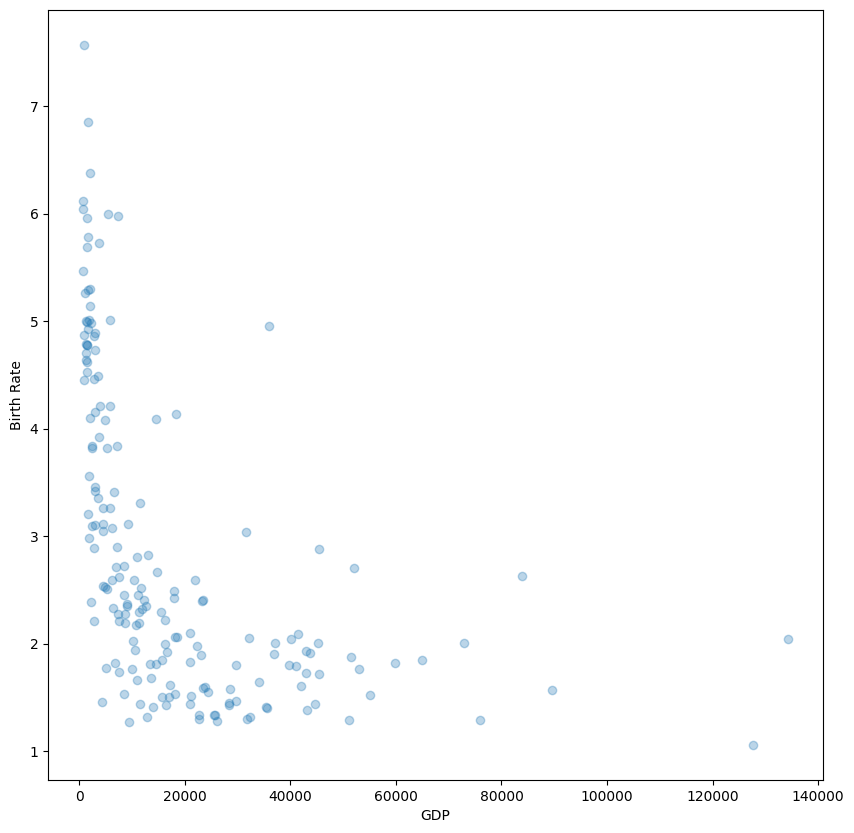

In [31]:
#散布図を書きます

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次にX軸だけ対数軸にしてみてみましょう．こうするとかなりきれいな直線的な関係が見えてきます．

つまり，GDPがわかれば出生率をかなり正確に予測できるということです．

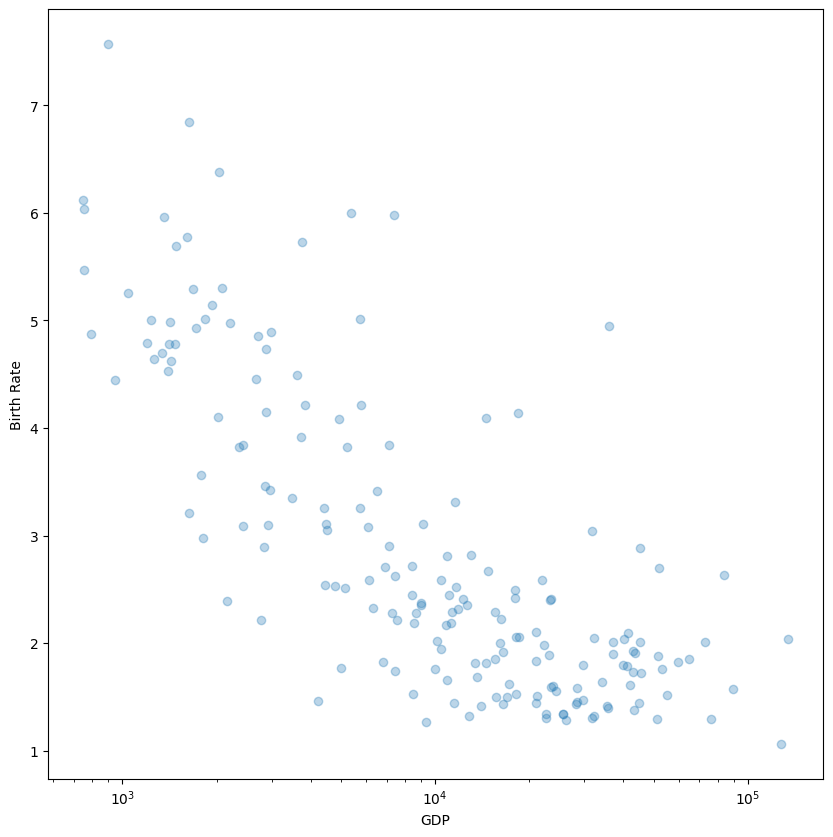

In [32]:
#上の図のX軸を対数軸にして表示してみます
plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次に先進国（OECD加盟国）のみを抜き出して分析してみましょう

In [33]:
df_dict = {}
for name, group in df.groupby('OECD高所得国'):
    df_dict[name] = group

df_dict[1].head() #df_dict[1]は先進国のデータだけのDataFrameです．

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ルクセンブルク,3,89577,1.57,True
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True


先進国だけを見るとGDPと出生率の関係は明確でないことがわかります

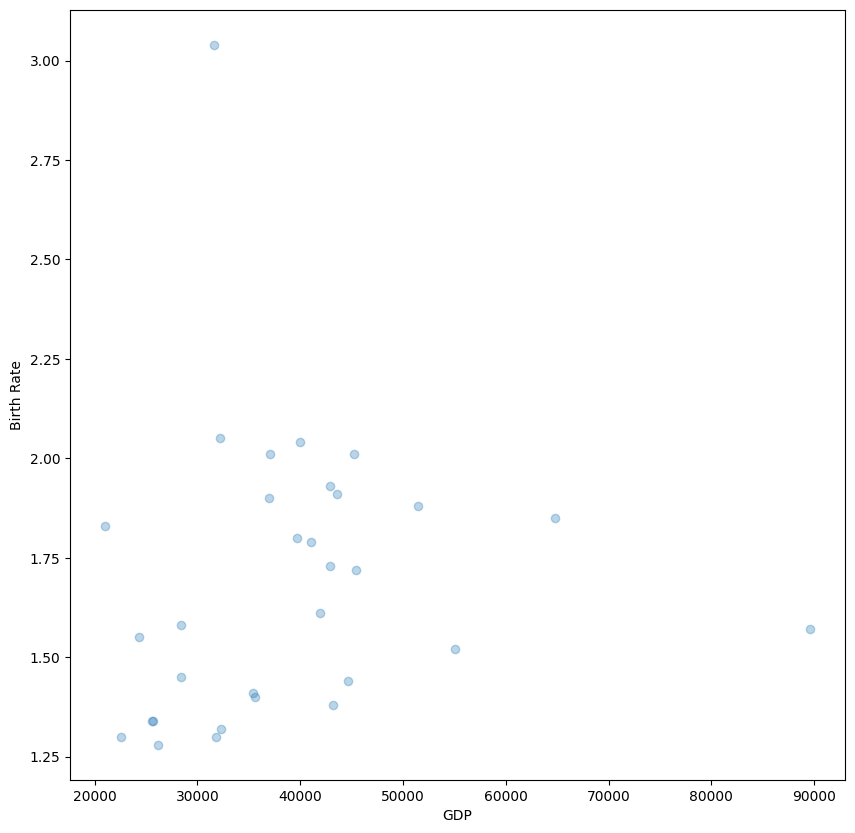

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

さらにここからイスラエルとルクセンブルクを抜きます

In [35]:
# inplace=Trueとすると，dropメソッドで列/行を削除したデータフレームに置き換えられます
df_dict[1].drop(['ルクセンブルク','イスラエル'], inplace=True)
df_dict[1].head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True
アイルランド,16,45282,2.01,True


外れ値を省くと，先進国ではGDPと出生率には明確な関係が認められないことがわかります．

もちろん，この「外れ値を省く」操作には十分な妥当性が必要です．

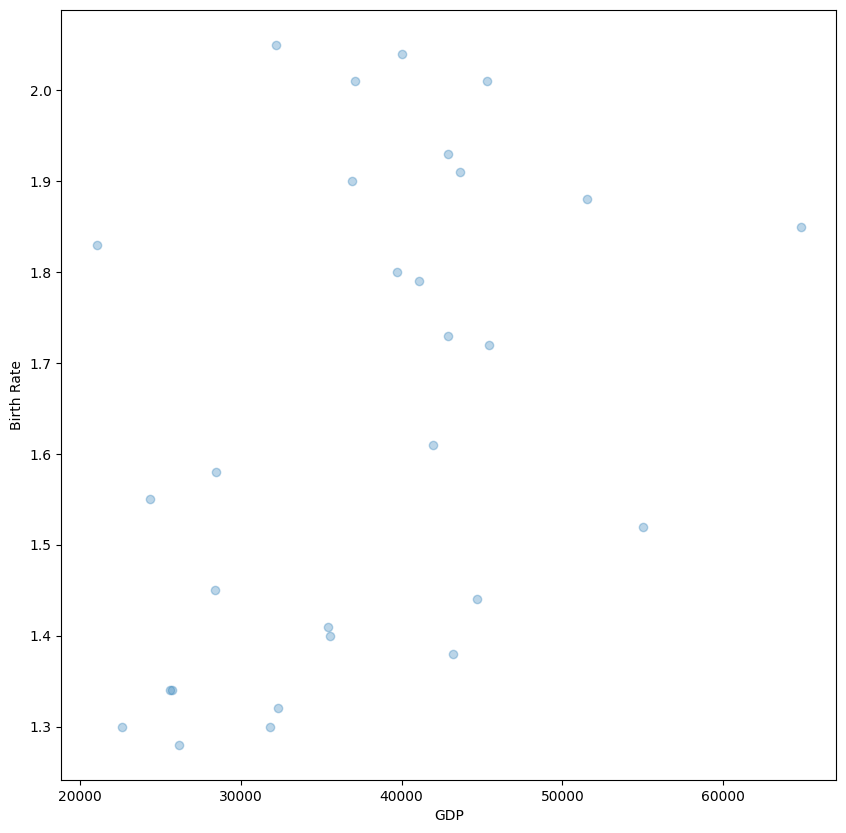

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

###政府統計の活用（Webデータ）


政府統計
社会・人口統計体系 / 統計でみる都道府県のすがた2023 / 社会生活統計指標

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200502&tstat=000001201623&cycle=0&year=20230&month=0&tclass1=000001201624

からExcelファイルをダウンロードします
https://www.e-stat.go.jp/stat-search/file-download?statInfId=000040019841&fileKind=0

ただ，一部いわゆる「神エクセル」なので，データの整理には大変苦労します．

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import urllib

url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000040019841&fileKind=0"


#xlsを読み込む関数
def read_xls(url):
    print(url)
    df = pd.read_excel(url)
    return df

#実行
df = read_xls(url)
df.head(10)

https://www.e-stat.go.jp/stat-search/file-download?statInfId=000040019841&fileKind=0


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,71,72,73,74,75,76,77,78,79,80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71,72,73,74,75,76,77,78,79,80
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No.36,NaN,No.37,NaN,No.38,NaN,No.39,NaN,No.40,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,夫65歳以上、妻60歳以上の夫婦のみの世帯の割合\n（対一般世帯数）,NaN,65歳以上世帯員の単独世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Percentage of households consisting only of ma...,NaN,Percentage of single-person households with me...,NaN,Percentage of dual-income households,NaN,"Ratio of marriages (per 1,000 persons)",NaN,"Ratio of divorces (per 1,000 persons)",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#A06302,NaN,#A06304,NaN,#F01503,NaN,#A06601,NaN,#A06602,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,単位,Unit,...,％,NaN,％,NaN,％,NaN,－,NaN,－,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,年度,Fiscal year,...,2020,NaN,2020,NaN,2020,NaN,2020,NaN,2020,NaN


In [43]:
#泥臭く列名のリネームや不要な行列の削除を行う
df = df.drop(df.columns[0:9], axis=1)
df = df.rename(columns=df.loc[5,:])
df = df.drop(df.index[range(0,12)])
df.head()

,NaN,NaN,総人口,NaN,総人口(男),NaN,総人口(女),NaN,外国人人口\n（人口10万人当たり）,NaN,...,夫65歳以上、妻60歳以上の夫婦のみの世帯の割合\n（対一般世帯数）,NaN,65歳以上世帯員の単独世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN
12,Hokkaido,NaN,518,8,245,8,274,8,656.9,39,...,14,9,14.65,8,20.71,43,4,11,1.74,4
13,Aomori-ken,NaN,122,31,58,32,65,31,436.9,46,...,11.97,35,14.08,11,26.99,21,3.26,45,1.55,18
14,Iwate-ken,NaN,120,32,58,31,62,32,573.1,45,...,11.75,38,12.72,20,28.7,14,3.24,46,1.39,39
15,Miyagi-ken,NaN,229,14,112,14,117,14,845,30,...,10.47,45,9.92,46,24.59,33,3.88,21,1.54,19
16,Akita-ken,NaN,95,38,45,39,50,38,380.5,47,...,13.75,12,14.45,9,29.38,11,2.8,47,1.26,45


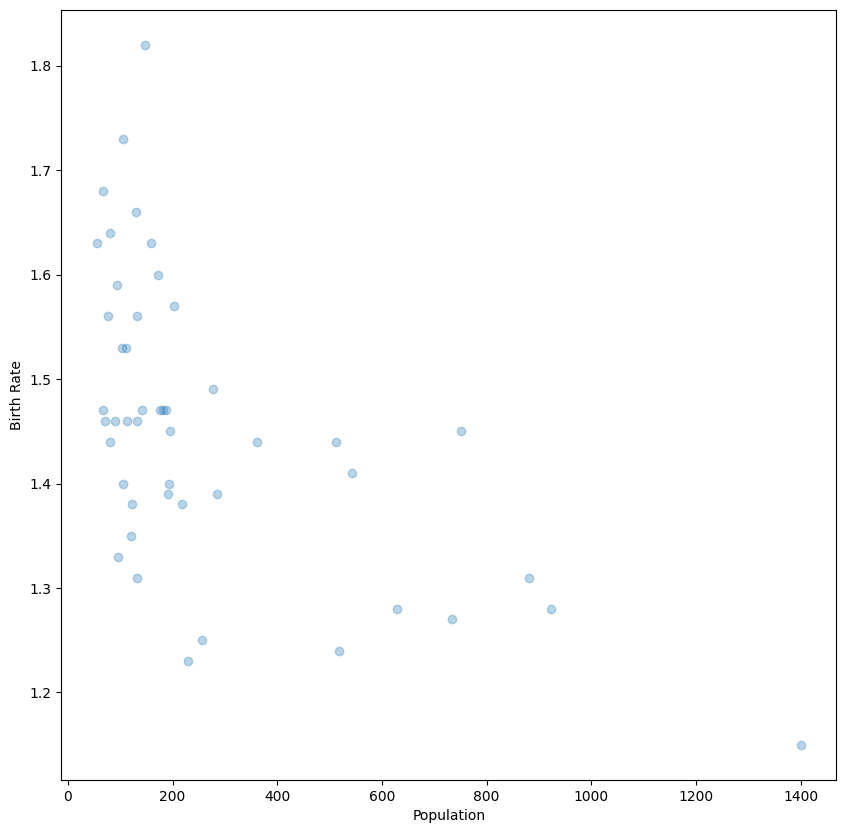

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(df['総人口'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('Population')
plt.ylabel('Birth Rate')
plt.show()